In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import urllib.request
import os
import astroML
import math
from sklearn.mixture import GaussianMixture

# for downloading 
def download(PATH,local_name,format_offile):
    '''This function takes PATH which is url of file and local_name i.e the name of file after downloaded and format
    file and downloads the file from web and stores in your path'''
    local_path=os.path.join("./",f'{local_name}.{format_offile}')
    urllib.request.urlretrieve(PATH,local_path)


def freedman(data):
#     freedman method for choosing no of bins
    data = np.asarray(data, dtype=np.float_)
    IQR  = scipy.stats.iqr(data, rng=(25, 75), scale=1, nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)
    mini= np.min(data)
    maxi=np.max(data)
    d = maxi-mini
    result = int((d / bw) + 1)
    return result

<p>Q1. Download the asteroid dataset from http://astrostatistics.psu.edu/datasets/asteroid_dens.dat. Apply the Shapiro-Wilk test to both the asteroid density values and the natural logarithm of the density values. From the p values, which of these is closer to a Gaussian distribution? Verify this by plotting histograms of both density and its logarithm and
overlaying the best-fit normal distribution (Look up stats.norm.fit)</p>

In [2]:
# downloading the dataset for this question
download("https://astrostatistics.psu.edu/datasets/asteroid_dens.dat","asteroid_dens","dat")

In [3]:
datContent = [i.strip().split() for i in open("asteroid_dens.dat").readlines()] #Reading .dat file in python
# datContent.pop(0)
i=0
for d in datContent:
    if(len(d)>1 and d[1]!='Ceres'):
        i=i+1
    elif(len(d)>1 and d[1]=='Ceres'):
        break
for j in range(i+4):
    datContent.pop(0)

datContent[11].append(0)
dens=np.array(datContent)[:,2]
dens=dens.astype(float)
errdens=np.array(datContent)[:,3]
errdens=errdens.astype(float)
print(dens)
print(errdens)
# storing density and error of density of asteroids in numpy array

[2.12 2.71 3.44 2.76 2.72 0.96 2.   3.26 2.5  1.2  1.62 1.3  1.96 2.6
 1.3  2.67 4.4  1.8  4.9  2.39 1.62 1.47 0.89 2.52 1.21 0.9  0.8 ]
[0.04 0.11 0.12 1.2  0.12 0.3  0.6  0.6  0.3  0.4  0.3  0.   0.34 0.5
 0.2  0.03 2.1  0.8  3.9  0.9  1.05 0.95 0.13 0.3  0.25 0.1  0.15]


In [4]:
# shapiro test on density values
statistic,p_value_d=scipy.stats.shapiro(dens)
print(f"The value of W in Shapiro Wilk test is {statistic} and corresponding p value is {p_value_d}")

The value of W in Shapiro Wilk test is 0.9246721863746643 and corresponding p value is 0.051220282912254333


In [5]:
# shapiro test on log(density) values
statistic_log,p_value_d_log=scipy.stats.shapiro(np.log(dens)) #natura logarithm of density values
print(f"The value of W in Shapiro Wilk test is {statistic_log} and corresponding p value is {p_value_d_log}")

The value of W in Shapiro Wilk test is 0.9686306715011597 and corresponding p value is 0.5660613775253296


<p>Our null hypothesis for shapiro test is whether data is drawn from Gaussian distribution and corresponding p values suggest that when the p value is close to the 5$\%$ or 0.05 then chance of rejecting the null hypothesis is significant. This implies that if we have p value close to 0.05 then it is more likely to be not gaussian distributed. So the natural logarithm of the density would be more like Gaussian distributed compared to density values obtained from above dataset.</p>

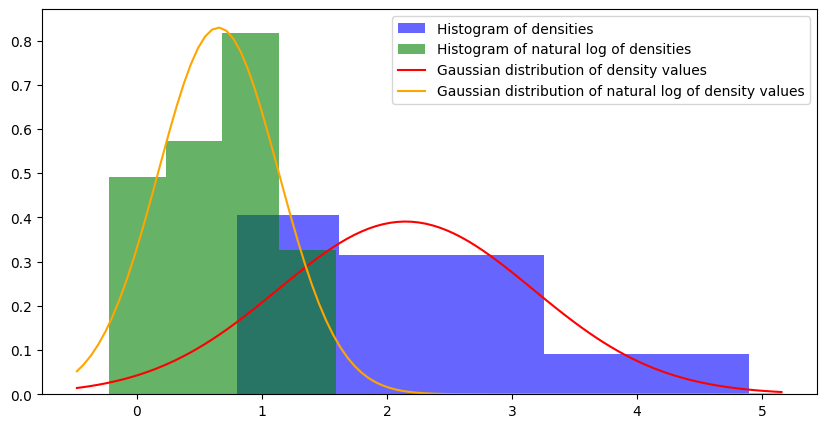

In [6]:
mu1,std1=scipy.stats.norm.fit(dens)
mu2,std2=scipy.stats.norm.fit(np.log(dens))
# computing parameters for best fit normal distribution based on the data

plt.figure(figsize=(10,5))
# using freedman to calculate number of bins to show histograms correctly
plt.hist(dens,bins=freedman(dens),label="Histogram of densities",density=True,color="blue",alpha=0.6)
plt.hist(np.log(dens),bins=freedman(np.log(dens)),label="Histogram of natural log of densities",density=True,color="green"
        ,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
norm1=scipy.stats.norm.pdf(x, mu1, std1)
norm2=scipy.stats.norm.pdf(x, mu2, std2)
plt.plot(x,norm1,label="Gaussian distribution of density values",color="red")
plt.plot(x,norm2,label="Gaussian distribution of natural log of density values",color="orange")
plt.legend()

<p>The above is the plot showing the histograms and corresponding best fit gaussian distributions. This also shows the natural logarithm of density values more like Gaussian distributed</p>

<p>Q2. Download the Hipparcos star catalog from http://iith.ac.in/~shantanud/HIP_star.dat. Detailed explanation of the columns in this dataset can be found in http://astrostatistics.psu.edu/datasets/HIP_star.htmlunder Dataset. Calculate using two-sample t-test whether the color (B-V) of the Hyades stars differs from the non-Hyades ones. The Hyades stars have Right Ascension between 50◦ and 100◦, declinations between 0 and 25◦, proper motion in RA between 90 and 130 mas/year, proper motion in DEC between -60 and -10 mas/year. Any other star which does not satisfy any of the above conditions is considered a non-Hyades star.</p>

In [7]:
# downloading the dataset for this question
download("https://people.iith.ac.in/shantanud/HIP_star.dat","star","dat")

In [8]:
datContent = [i.strip().split() for i in open("star.dat").readlines()] #Reading .dat file in python
datContent.pop(0) #removing header

hyades=[]
not_hyades=[]
for d in datContent:
    if(float(d[2])>=50 and float(d[2])<=100):
        if(float(d[3])>=0 and float(d[3])<=25):
            if(float(d[5])>=90 and float(d[5])<=130):
                if(float(d[6])>=-60 and float(d[6])<=-10):
                    hyades.append(d)
                else:
                    not_hyades.append(d)
            else:
                not_hyades.append(d)
        else:
            not_hyades.append(d)
    else:
        not_hyades.append(d)
# We had two arrays consisting of features of hyades and not hyades stars 

In [9]:
hyades=np.array(hyades)
not_hyades=np.array(not_hyades)

BV_hyades=hyades[:,8].astype(float)
not_BV_hyades=not_hyades[:,8].astype(float)
# color of hyades and not hyades stars

tteststatistic,pvalue=scipy.stats.ttest_ind(BV_hyades,not_BV_hyades,equal_var=False)
tteststatistic1,pvalue1=scipy.stats.ttest_ind(BV_hyades,not_BV_hyades)
print(f"The T-test statistic on colors of hyades and non hyades stars is {tteststatistic} and p value is {pvalue} when \
equivariance is not considered")
print(f"The T-test statistic on colors of hyades and non hyades stars is {tteststatistic1} and p value is {pvalue1} when \
equivariance is considered")

The T-test statistic on colors of hyades and non hyades stars is -3.8748560945014803 and p value is 0.0001921285531088994 when equivariance is not considered
The T-test statistic on colors of hyades and non hyades stars is -3.860436921860911 and p value is 0.00011582222192442334 when equivariance is considered


<p>From the above we can clearly see that p value is much less than 0.05 which means we can reject the null hypothesis. As our null hypothesis is that the both samples are identical (according to mean sense) and we are rejecting the null hypothesis implies that these hyades and non hyades stars have different colors (BV values)</p>

<p>Q3. The T90 distribution for Beppo-Sax T90 data can be found at http://www.iith.ac.in/~shantanud/beppoSax.txt. Apply GMM to log to base 10 of T90 data and find the optimum number of components using AIC and BIC by plotting BIC as a function of number of components</p>

In [10]:
# downloading the dataset for this question
download("http://www.iith.ac.in/~shantanud/beppoSax.txt","beppoSax","txt")

In [11]:
data = np.array([i.strip().split() for i in open("beppoSax.txt").readlines()]).astype(float)
log10data=np.log10(data) #data obtained after applying log to base 10 on data array

In [12]:
maxrangeN=14 #denotes x which is from 1 to x we check the corresponding paramter models score and test to find optimum N
models = []  #Gaussian mixture of all possible number of components from 1 to max range N
for i in range(maxrangeN):
    models.append(GaussianMixture(n_components=i+1))
    models[i].fit(log10data) #fitting model with i number of components on logarithm of data

AIC = [m.aic(log10data) for m in models] # Computing AIC for those models 
BIC = [m.bic(log10data) for m in models] # Computing BIC for those models 

index = np.argmin(BIC) # computes index of the model with least BIC 
optimum_n_model = models[index]
print("best fit converged:", optimum_n_model.converged_)
print("For Least BIC we have optimum number of components as",index+1)

best fit converged: True
For Least BIC we have optimum number of components as 2


Text(0.5, 1.0, 'BIC vs Number of Components plot')

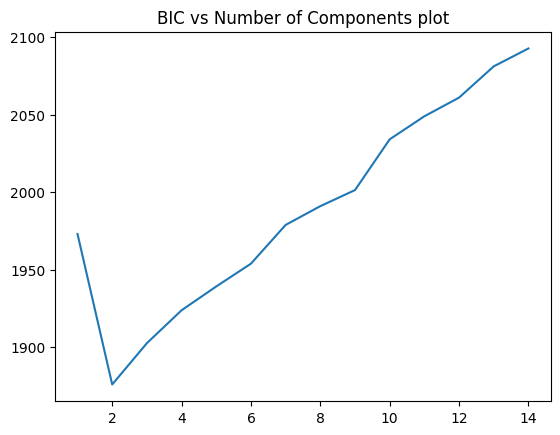

In [13]:
# plotting BIC vs number of components
x=np.linspace(1,maxrangeN,maxrangeN)
plt.plot(x,BIC)
plt.title('BIC vs Number of Components plot')

<p>From the above graph we confirm that Optimum number of components for Gaussian Mixture Model subject to minimum BIC for logarithm of base 10 of the given dataset is 2.</p>